# Chapter 10 - A Gentle Introduction to White Noise

If a `time series is white noise`, **it is a sequence of random numbers and cannot be predicted**. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.

After completing this tutorial, you will know:
- The definition of a white noise time series and why it matters.
- How to check if your time series is white noise.
- Statistics and diagnostic plots to identify white noise in Python.

## 10.1 What is a White Noise?

A time series may be white noise. `A time series is white noise` **if the variables are independent and identically distributed with a mean of zero**. This `means` that **all variables have the same variance (sigma2) and each value has a zero correlation with all other values in the series**. If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian white noise.

## 10.2 Why Does it Matter?

White noise is an important concept in time series analysis and forecasting. It is important for two main reasons:
- **Predictability**: If your `time series is white noise, then, by definition, it is random`. You cannot reasonably model it and make predictions.
- **Model Diagnostics**: The series of errors from a time series forecast model should ideally be white noise.

`Model Diagnostics is an important area of time series forecasting`. Time series data are expected to contain some white noise component on top of the signal generated by the underlying process. 

For example:
        y(t) = signal(t) + noise(t)
        
## 10.3 Is your Time Series White Noise?
Your time series is not white noise if any of the following conditions are true:
- Does your series have a `non-zero mean`?
- Does the `variance change over time`?
- Do `values correlate with lag values`?

Some tools that you can use to check if your time series is white noise are:
- **Create a line plot**. Check for gross features like a changing mean, variance, or obvious relationship between lagged variables.
- **Calculate summary statistics**. Check the mean and variance of the whole series against the mean and variance of meaningful contiguous blocks of values in the series (e.g. days, months, or years).
- **Create an autocorrelation plot**. Check for gross correlation between lagged variables.        

## 10.4 Example of White Noise Time Series

In this section, we will create a Gaussian white noise series in Python and perform some checks. It is helpful to create and review a white noise time series in practice. It will provide the frame of reference and example plots and statistical tests to use and compare on your own time series projects to check if they are white noise.

In [1]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from pylab import rcParams

# seed random number generator
seed(1)

# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)

In [2]:
# summary stats
print(series.describe())

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


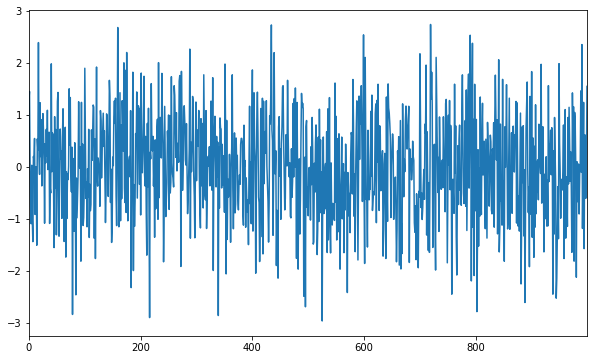

In [3]:
# line plot
rcParams['figure.figsize'] = 10, 6
series.plot()
pyplot.show()

We can see that the mean is nearly 0.0 and the standard deviation is nearly 1.0. Some variance is expected given the small size of the sample. 

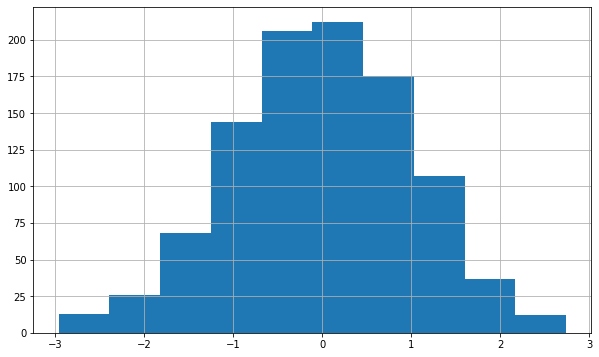

In [4]:
# histogram plot
rcParams['figure.figsize'] = 10, 6
series.hist()
pyplot.show()

Indeed, the histogram shows the tell-tale bell-curve shape.

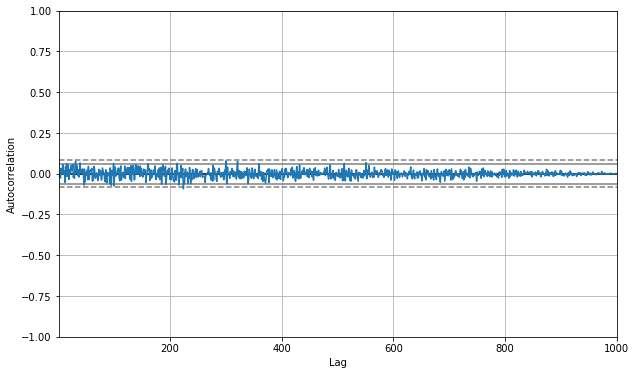

In [5]:
# autocorrelation
rcParams['figure.figsize'] = 10, 6
autocorrelation_plot(series)
pyplot.show()

The correlogram does not show any obvious autocorrelation pattern. There are some spikes above the 95% and 99% confidence level, but these are a statistical fluke (casualidad).